In [1]:
import os
initial_dir = os.getcwd()
print(initial_dir)

/home/kalmar/Mathematics/Research/MPI Tuebingen/TDA-Cause-Effect-Pairs


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import re
import sys

sys.path.append("/home/kalmar/Mathematics/Research/MPI Tuebingen/Dionysus-python3/build/bindings/python")
import dionysus

%reload_ext autoreload
%autoreload 2

import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

tda = __import__("TDA")
tsp = __import__("topology-summary-plotter")
out_i = __import__("identify-outliers")
sampler = __import__("points-sampler")
os.chdir(initial_dir)

/usr/lib64/python3.4/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
pattern = re.compile('pair00..\.txt')
files = sorted([x for x in os.listdir('./pairs/') if pattern.match(x)])
file_names = []
dir_names = []
for f in files:
    with open("./pairs/" + f) as points:
        x = points.readline()
        if len(x.split()) > 2:
            file_names.append(f)
            dir_names.append(f[:-4])
file_names

['pair0052.txt',
 'pair0053.txt',
 'pair0054.txt',
 'pair0055.txt',
 'pair0071.txt',
 'pair0081.txt',
 'pair0082.txt',
 'pair0083.txt']

In [4]:
import scipy.spatial.distance as spspd
import scipy.spatial as spsp
points = np.loadtxt('./pairs/'+file_names[1])

In [5]:
class Distances:
    """
    Class representing Dionysus distances for use in the Rips filtration
    """
    def __init__(self, points):
        self.points = points
        from scipy.spatial.distance import cdist
        self.distances = cdist(self.points, self.points)

    def __len__(self):
        return self.points.shape[0]

    def __call__(self, p1, p2):
        print(p1,p2)
        return self.distances[p1][p2]

d = Distances(points)

In [6]:
%timeit Distances(points)

The slowest run took 4.06 times longer than the fastest. This could mean that an intermediate result is being cached 
100 loops, best of 3: 4.99 ms per loop


In [7]:
for i, f in enumerate(file_names):
    x = np.loadtxt('./pairs/'+f)
    print(i, f, x.shape)

0 pair0052.txt (10226, 8)
1 pair0053.txt (989, 4)
2 pair0054.txt (392, 5)
3 pair0055.txt (72, 32)
4 pair0071.txt (120, 8)
5 pair0081.txt (365, 3)
6 pair0082.txt (365, 3)
7 pair0083.txt (365, 3)


In [15]:
file = file_names[1]
points = np.loadtxt("./pairs/" + file)

In [16]:
import time

In [20]:
timing_table = []
for i in range(20,400, 20):
    begin = time.clock()
    x = tda.GeometricComplex(points[:i], range(0,1), range(1,4), full_initialisation=False)
    end = time.clock()
    timing_table.append([i, end-begin, len(x.full_complex)])

INFO:root:Creating GeometricComplex on 20 points
INFO:root:Variable X range: 0
INFO:root:Variable Y range: 1 2 3
INFO:root:Using Rips-complex with radius 4.000000. This may be slow for dense sets!
INFO:root:Created rips full complex of size 182
INFO:root:The threshold 2.790914 limits the complex size to 136
INFO:root:Creating GeometricComplex on 40 points
INFO:root:Variable X range: 0
INFO:root:Variable Y range: 1 2 3
INFO:root:Using Rips-complex with radius 4.000000. This may be slow for dense sets!
INFO:root:Created rips full complex of size 717
INFO:root:The threshold 2.336728 limits the complex size to 394
INFO:root:Creating GeometricComplex on 60 points
INFO:root:Variable X range: 0
INFO:root:Variable Y range: 1 2 3
INFO:root:Using Rips-complex with radius 4.000000. This may be slow for dense sets!
INFO:root:Created rips full complex of size 1608
INFO:root:The threshold 1.769166 limits the complex size to 539
INFO:root:Creating GeometricComplex on 80 points
INFO:root:Variable X ra

In [21]:
timing = np.array(timing_table)

In [35]:
x.limited_complex.sort(dionysus.data_dim_cmp)
pers = dionysus.StaticPersistence(x.limited_complex)
pers.pair_simplices()
smap = pers.make_simplex_map(x.limited_complex)
deaths = [smap[i.pair()].data for i in pers
                      if smap[i].dimension() == 0]

In [36]:
max(deaths)

2.985426653991461

In [42]:
import numpy.ma as ma
outliers = np.loadtxt('test/pair0053/outliers_knn').astype(np.int)
points_masked = ma.MaskedArray(points)
out = 70
points_masked[outliers[:out]] = ma.masked
cleaned_points = points_masked.compressed().reshape(
    points.shape[0]-out, 4)

In [43]:
timing_table2 = []
for i in range(20,400, 20):
    begin = time.clock()
    x = tda.GeometricComplex(cleaned_points[:i], range(0,1), range(1,4), full_initialisation=False)
    end = time.clock()
    timing_table2.append([i, end-begin, len(x.full_complex)])

INFO:root:Creating GeometricComplex on 20 points
INFO:root:Variable X range: 0
INFO:root:Variable Y range: 1 2 3
INFO:root:Using Rips-complex with radius 4.000000. This may be slow for dense sets!
INFO:root:Created rips full complex of size 182
INFO:root:The threshold 2.790914 limits the complex size to 136
INFO:root:Creating GeometricComplex on 40 points
INFO:root:Variable X range: 0
INFO:root:Variable Y range: 1 2 3
INFO:root:Using Rips-complex with radius 4.000000. This may be slow for dense sets!
INFO:root:Created rips full complex of size 717
INFO:root:The threshold 2.579504 limits the complex size to 440
INFO:root:Creating GeometricComplex on 60 points
INFO:root:Variable X range: 0
INFO:root:Variable Y range: 1 2 3
INFO:root:Using Rips-complex with radius 4.000000. This may be slow for dense sets!
INFO:root:Created rips full complex of size 1603
INFO:root:The threshold 1.966714 limits the complex size to 688
INFO:root:Creating GeometricComplex on 80 points
INFO:root:Variable X ra

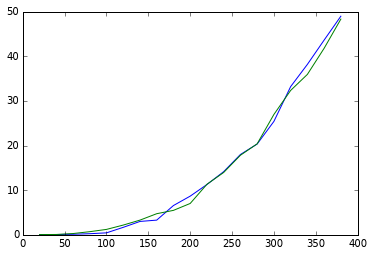

In [45]:
import matplotlib.pyplot as plt
plt.plot(timing[:,0], timing[:,1])
plt.plot(timing2[:,0], timing2[:,1])


In [44]:
timing2 = np.array(timing_table2)

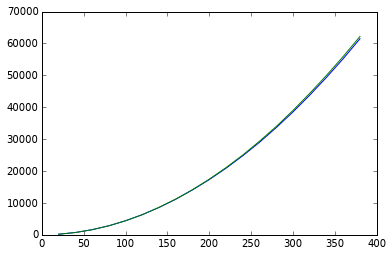

In [46]:
plt.plot(timing[:,0], timing[:,2])
plt.plot(timing2[:,0], timing2[:,2])

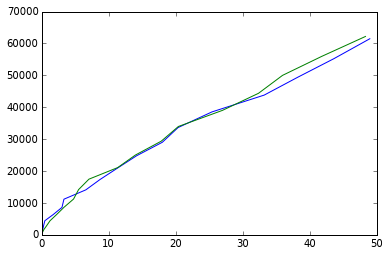

In [48]:
plt.plot(timing[:,1], timing[:,2])
plt.plot(timing2[:,1], timing2[:,2])

In [8]:
f = dir_names[2]
print(f)
os.chdir(initial_dir+'/test/'+f)

pair0054


In [9]:
import numpy.ma as ma

class CEPair:
    def __init__(self, model):
        self.current_dir = os.getcwd()
        self.name = self.current_dir[-8:]
        self.model = model
        pairs_dir = os.path.abspath(os.path.join(self.current_dir, os.pardir,
                                                 os.pardir, 'pairs'))
        all_pairs_metadata = np.loadtxt(os.path.join(pairs_dir, 'pairmeta.txt'))
        self.metadata = all_pairs_metadata[int(self.name[-4:]) - 1]

        self.x_range = range(int(self.metadata[1])-1, int(self.metadata[2]))
        self.y_range = range(int(self.metadata[3])-1, int(self.metadata[4]))
        
        std_points_file = os.path.join(self.current_dir, "std_points")
        self.std_points = np.loadtxt(std_points_file)
        self.dimension = int(self.std_points[0].shape[0])

        outliers_file = os.path.join(self.current_dir, "outliers_" + self.model)
        self.outliers = np.loadtxt(outliers_file).astype(np.int)
        
        self.compute_topological_summary()
    
    def compute_topological_summary(self):
        points_masked = ma.MaskedArray(self.std_points)
        self.persistence_pairs = []
        self.extrema = []
        for i, outlier in enumerate(self.outliers[:2], start=1):
            print(i, end=" ", flush=True)
            points_masked[outlier] = ma.masked
            cleaned_points = points_masked.compressed().reshape(
                self.std_points.shape[0] - i, self.dimension)
            self.geometric_complex = tda.GeometricComplex(cleaned_points,
                                                      self.x_range,
                                                      self.y_range)

In [17]:
%prun tda.GeometricComplex(points[:400], full_initialisation=False)

INFO:root:Creating GeometricComplex on 400 points
INFO:root:Variable X range: 0
INFO:root:Variable Y range: 1
INFO:root:Using Rips-complex with radius 2.000000. This may be slow for dense sets!
INFO:root:Created rips full complex of size 37501
INFO:root:The threshold 1.507339 limits the complex size to 28243


In [11]:
%prun tda.GeometricComplex(points[500:], full_initialisation=True)

INFO:root:Creating GeometricComplex on 489 points
INFO:root:Variable X range: 0
INFO:root:Variable Y range: 1
INFO:root:Using Rips-complex with radius 2.000000. This may be slow for dense sets!
INFO:root:Created rips full complex of size 79206
INFO:root:The threshold 1.552808 limits the complex size to 77632
INFO:root:X-variable: Projecting on 0-th axis
DEBUG:root:Initialising Static Presistence
DEBUG:root:Pairing Simplices
DEBUG:root:Computing Persistence Pairs
DEBUG:root:Undying simplex: <358> at 0.000000
DEBUG:root:Creating Diagrams
DEBUG:root:Initialising Static Presistence
DEBUG:root:Pairing Simplices
DEBUG:root:Computing Persistence Pairs
DEBUG:root:Undying simplex: <5> at 0.000000
DEBUG:root:Creating Diagrams
INFO:root:Y-variable: Projecting on 1-th axis
DEBUG:root:Initialising Static Presistence
DEBUG:root:Pairing Simplices
DEBUG:root:Computing Persistence Pairs
DEBUG:root:Undying simplex: <401> at 0.000000
DEBUG:root:Creating Diagrams
DEBUG:root:Initialising Static Presistence

In [13]:
%lprun -f tda.GeometricComplex.__create_full_complex__ tda.GeometricComplex(points[500:], full_initialisation=False)

INFO:root:Creating GeometricComplex on 489 points
INFO:root:Variable X range: 0
INFO:root:Variable Y range: 1
INFO:root:Using Rips-complex with radius 2.000000. This may be slow for dense sets!
INFO:root:Created rips full complex of size 79206
INFO:root:The threshold 1.552808 limits the complex size to 77632


In [16]:
%prun x = CEPair("knn")

1 

INFO:root:Creating GeometricComplex on 391 points
INFO:root:Variable X range: 0 1 2
INFO:root:Variable Y range: 3 4
INFO:root:Using Rips-complex. This may be slow for dense sets!
INFO:root:Created rips full complex of size 46160
INFO:root:The threshold 0.495461 limits the complex size to 46079
INFO:root:X-variable: Projecting on 0-th axis
DEBUG:root:Initialising Static Presistence
DEBUG:root:Pairing Simplices
DEBUG:root:Computing Persistence Pairs
DEBUG:root:Undying simplex: <314> at 0.000000
DEBUG:root:Undying simplex: <224> at 1.439417
DEBUG:root:Undying simplex: <195> at 1.468181
DEBUG:root:Undying simplex: <196> at 1.492835
DEBUG:root:Undying simplex: <199> at 1.492835
DEBUG:root:Undying simplex: <202> at 1.587345
DEBUG:root:Undying simplex: <176> at 1.595563
DEBUG:root:Undying simplex: <211> at 1.628436
DEBUG:root:Undying simplex: <192> at 1.817454
DEBUG:root:Undying simplex: <162> at 1.824029
DEBUG:root:Undying simplex: <231> at 1.838000
DEBUG:root:Undying simplex: <185> at 1.838

2 

INFO:root:Creating GeometricComplex on 390 points
INFO:root:Variable X range: 0 1 2
INFO:root:Variable Y range: 3 4
INFO:root:Using Rips-complex. This may be slow for dense sets!


KeyboardInterrupt: 